# **Overview**
New York City Taxi and Limousine Commission (TLC) is the agency responsible
for licensing and regulating New York City's medallion (yellow) taxis, street hail livery (green) taxis,
for-hire vehicles (FHVs), commuter vans, and paratransit vehicles.

The Taxi and Limousine Commission (TLC) regulates how much a cab can charge per mile or per minute, determines a cab company's leasing fees for drivers, monitors routes taken by the drivers (to ensure they are not artificially inflating the price), and much more. In essence, a cab company (or a cab driver) can only make as much money as the government allows them to make.

The TLC collects trip record
information for each taxi and for-hire vehicle trip completed by our licensed drivers and vehicles.
We receive taxi trip data from the technology service providers (TSPs) that provide electronic
metering in each cab,

*Source: https://www.investopedia.com/articles/professionals/092515/how-nycs-yellow-cab-works-and-makes-money.asp*

**Stakeholder Statement**

The stakeholders are management from TLC as the taxi operators in NYC.

Taxi companies may be interested in understanding demand patterns, identifying popular pickup/drop-off locations, and pricing strategies to maximize revenue. They may also want to improve service quality and efficiency based on customer behavior analysis.

**Goals Setting & Problem Statement**

This project analysis aims to provide insights on the operations of NYC taxi, 
    
    1. How to optimize taxi fares ?  
   
    2. How to optimize the distribution of drivers?
   
    3. How to to better serve customers?  



## **Dataset: NYC TLC Taxi Trip Data**

The taxi dataset used in this project is yellow taxi trip data, which records attributes such as pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. Yellow taxis are taxis that allowed to respond to street hailed from a passenger in all five boroughs.



### NYC TLC Taxi Trip Data

| Columns       | Description |  Notes| 
| :---          |    :----   | :---- | 
| 'VendorID'    | LPEP provider that provided the record.| [NOT ESSENTIAL > TO BE DROPPED] |
| 'lpep_pickup_datetime',   | Starting time from taxi meter
| 'lpep_dropoff_datetime',  | Ending time from taxi meter
| 'store_and_fwd_flag',     | Trip record are saved and send after signal received Y= store n forwad N=Not store n forward  
| 'RatecodeID',             | The final rate code in effect at the end of the trip.|     1=Standard rate, 2=JFK (Airport rate), 3=Newark   (Newark Country), 4=Nassau or Westchester (County), 5=Negotiated fare , 6=Group ride|
|   *There are different rates for different type of trips & airport destination.*
| 'PULocationID',           | Pickup location, using Taxi Zone code
| 'DOLocationID',           | Dropoff location, using Taxi Zone code
| 'passenger_count',        | # of passengers, driver manually input, max 6 by law
| 'trip_distance',          | Distance per trip, in miles
| 'fare_amount',            | The time and distance fare is calculated by the meter. includes the $0.50 and $1 rush hour and overnight charges
| 'extra',                  | only includes the $0.50 and $1 rush hour and overnight charges.
| 'mta_tax',                | $0.50 MTA tax that is automatically triggered based on the metered rate in use.
| 'tip_amount',             | tips from customers, tips from customers with CC payment
| 'tolls_amount',           | tolls fare amount
| 'ehail_fee',              | - | unidentified, all nulls  **[TO BE DROPPED]** |
| 'improvement_surcharge',  | $0.30 improvement surcharge assessed on hailed trips at the flag drop.
| 'total_amount',           | The total amount charged to passengers. Does not include cash tips.
| 'payment_type',           | 1 = Credit card 2 = Cash 3 = No charge 4 = Dispute 5 = Unknown 6 = Voided trip
| 'trip_type',              | 1 = Street|hail (inside the city) 2 = Dispatch (outside city)
| 'congestion_surcharge'    | surcharge for traffic congestion

---


**ADDITIONAL Dataset: Taxi Zone Dataset**

The pick-up and drop-off locations are populated by numbers ranging from 1 to 263. These numbers corresponds to taxi zone.

• Taxi Zone Shapefile: contains geometric information of each taxi zones.

• Taxi Zone Look Up Table: a table that contains a list of TLC taxi zone location IDs, location names, and corresponding boroughs of each zone.

Obtained from: https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf


# 1. Data Preparation: Reading & Load Data

In [130]:
#Import relevant library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#Loading Data

df = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/NYC TLC Trip Record.csv')

/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_12858/729993034.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/NYC TLC Trip Record.csv')


In [42]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [43]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [132]:
#Construct deep Info on columns & values:


NYCtaxi = []
for i in df.columns:
    NYCtaxi.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(NYCtaxi, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.00,2,"[2, 2, 2]"
1,lpep_pickup_datetime,object,0,0.00,66575,"[2023-01-21 09:38:25, 2023-01-26 18:06:21, 202..."
2,lpep_dropoff_datetime,object,0,0.00,66519,"[2023-01-20 10:48:34, 2023-01-30 07:36:24, 202..."
3,store_and_fwd_flag,object,4324,6.34,2,"[N, N, N]"
4,RatecodeID,float64,4324,6.34,6,"[1.0, 1.0, 1.0]"
5,PULocationID,int64,0,0.00,226,"[129, 74, 95]"
6,DOLocationID,int64,0,0.00,249,"[210, 41, 56]"
7,passenger_count,float64,4324,6.34,10,"[1.0, 1.0, 1.0]"
8,trip_distance,float64,0,0.00,1870,"[1.66, 0.0, 0.97]"
9,fare_amount,float64,0,0.00,2553,"[7.0, 48.5, 26.8]"


---

# 2. Data Cleaning

**Overview**:
- Drop Duplicate rows 
- Cleaning Null Values
    - Substitute null values if appropriate data are available 
    - Drop null values if appropriate data not available 
    - Null values in **store_and_fwd_flag** column --> replace with Y
    - Null values in **RatecodeID** column --> replace according to MTAtax 
    - Null values in **passenger_count** column --> replace according to mean/median of passenger 
    - Null values in **payment_type** column --> Replace with CC if tips are recorded
    - Null values in **trip_type** column --> replace types based on trip distance / fare / PU & DU location
    - Null values in **congestion_surcharge** --> replace with data based on location / mean/median of available values
- Finding & Fixing Data Anomalies
    - Check distribution in numerical columns, observe & fix outliers
    - MTA Tax
    - Fare
- Dropping Unnecessary Columns
- Converting columns containing time infro from Object > Datetime
    - lpep_pickup_datetime
    - lpep_dropoff_datetime

## 2.1 Dropping Duplicate Rows

In [133]:
#Check for duplicates --> CLEAR

df[df.duplicated()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


No duplicate rows

## 2.2 Cleaning Null Values

In [ ]:
2.2.1


In [134]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [127]:
#Percentage of missing values
round(df.isna().sum()/len(df)*100,2)

VendorID                 0.00
lpep_pickup_datetime     0.00
lpep_dropoff_datetime    0.00
store_and_fwd_flag       0.00
RatecodeID               6.34
PULocationID             0.00
DOLocationID             0.00
passenger_count          6.34
trip_distance            0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
payment_type             6.34
trip_type                6.35
congestion_surcharge     6.34
dtype: float64

The missing values are contained on **4324** rows where columns are ['RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'].

Assuming the **6.34%** data won't have significant impact if dropped, it's decided to proceed with **dropping selected rows containing null values**.

In [138]:
#Dropping rows containing null values 
df.dropna(subset=['store_and_fwd_flag','RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'], inplace=True)

In [139]:
#Check for missing values
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                63877
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
dtype: int64

Assumin

### 2.2.1 'store_and_fwd_flag' Column

Assuming the missing values are from the bug within 'store_and_fwd_flag' feature, which supposed to notify the system when no signal are available to update the data, **all missing values will be dropped**

In [140]:
#Check all the missing values on column
df[df['store_and_fwd_flag'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [64]:
df[df['store_and_fwd_flag'].isna()].shape

(4324, 19)

**4324** Total missing values from the column 'store_and_fwd_flag'. 

In [61]:
#Missing values based on VendorID

df[df['store_and_fwd_flag'].isna()]['VendorID'].value_counts(normalize=True)

VendorID
2    0.970398
1    0.029602
Name: proportion, dtype: float64

**97%** of the missing values are obtained from **TSP vendor 2**, which indicates that the metering devices are **less reliable**.

In [70]:
#Replacing missing values in 'store_and_fwd_flag' wih "Y", assuming the null came from hardware bug

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('Y')


In [73]:
#Check if any nan exist in the column
df['store_and_fwd_flag'].isna().sum()

0

### 2.2.2 Null values in **RatecodeID** column

Based on the data guide, the Ratecode should follow the set code: 


| Code       | Rate |  Notes| 
| :---          |    :----   | :---- | 
|1 |Standard rate| 
|2 |JFK (Airport rate)|
|3 |Newark   (Newark Country)|
|4 |Nassau or Westchester (County)|
|5 |Negotiated fare |
|6 |Group ride|

In [86]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

There are anomalies in the data where Ratecode is inputted as **99** whereas it should only be inputted with [1,2,3,4,5]

In [111]:
#Checking rows where df['RatecodeID'] == 99.0
df[df['RatecodeID'] == 99.0][['fare_amount', 'trip_distance']].describe()

,fare_amount,trip_distance
count,10.000000,10.000000
mean,25.260000,6.890000
std,11.638748,8.542502
min,15.200000,0.600000
25%,15.950000,1.875000
50%,23.000000,3.500000
75%,27.200000,6.425000
max,50.200000,28.300000


In [112]:
#Check where ratecode is null
df[df['RatecodeID'].isna()][['fare_amount', 'trip_distance']].describe()

,fare_amount,trip_distance
count,4324.000000,4324.000000
mean,24.399066,89.926906
std,13.885165,2322.475821
min,-43.540000,0.000000
25%,14.517500,1.770000
50%,20.300000,3.360000
75%,30.425000,6.102500
max,181.070000,120098.840000


/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_12858/2772932758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

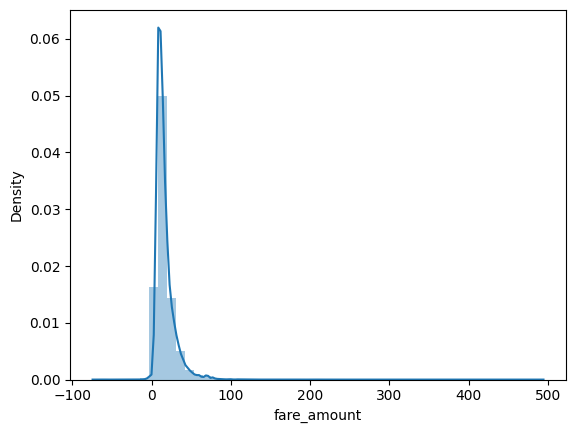

In [106]:
sns.distplot(df['fare_amount'])

In [97]:
df.groupby(['RatecodeID'])['fare_amount'].mean()

RatecodeID
1.0     15.525883
2.0     67.886076
3.0     62.490000
4.0     95.492982
5.0     29.131825
99.0    25.260000
Name: fare_amount, dtype: float64

In [98]:
df.groupby(['RatecodeID'])['fare_amount'].median()

RatecodeID
1.0     12.8
2.0     70.0
3.0     31.6
4.0     64.5
5.0     20.0
99.0    23.0
Name: fare_amount, dtype: float64

In [99]:
df.groupby(['RatecodeID'])['trip_distance'].median()

RatecodeID
1.0      1.80
2.0     17.30
3.0      3.20
4.0     13.81
5.0      0.26
99.0     3.50
Name: trip_distance, dtype: float64

In [ ]:
#Check the fare amount according to rate code

In [89]:
df['mta_tax'].value_counts()

mta_tax
 0.50    53177
 1.50     9065
 0.00     5778
-0.50      165
 1.00       25
 2.75        1
Name: count, dtype: int64

In [82]:
df[df['RatecodeID'].isna()]['mta_tax'].value_counts()

mta_tax
0.0    4187
0.5     137
Name: count, dtype: int64

In [85]:
#Check df[df['RatecodeID'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,Y,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,Y,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,Y,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,Y,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,Y,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,Y,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,Y,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,Y,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,Y,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


## 2.3 Cleaning up Data Anomalies

## 2.x Dropping Columns

a. ['ehail_fee'] columns are 100% null -> DROP

In [51]:
# Drop 'ehail_fee' column

df.drop(columns='ehail_fee', inplace=True)

In [53]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

---

# 3. Feature Engineering: 
Adding additional columns from original data

- Calculate the duration of each trip using the difference between pickup and drop-off time.
- Identify the month, day of the week, and hour for each trip. Then classify whether the trip is in workday, weekend, or, holiday.
- Calculate the tip percentage using total amount and tip amount.
- Adding Location column referrung to taxi zone code table